

# Importring necessary libraries





In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns


# Reading the data

In [162]:
df = pd.read_csv('/train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [164]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [165]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# Data Cleaning & EDA

In [166]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_SALE'] = pd.DatetimeIndex(df['DATE_SALE']).year
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
df['DATE_BUILD'] = pd.DatetimeIndex(df['DATE_BUILD']).year
df['AGE'] = df['DATE_SALE'] - df['DATE_BUILD']
df.head()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
0,P03210,Karapakkam,1004,2011,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,2006,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,2012,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,2010,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,2009,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


Date of sale and date of year has been converted into year and an extra column age of house is extracted

In [167]:
df.drop(['PRT_ID','DATE_SALE','DATE_BUILD','REG_FEE','COMMIS'],inplace=True,axis=1)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


Dropping the unneccesary columns

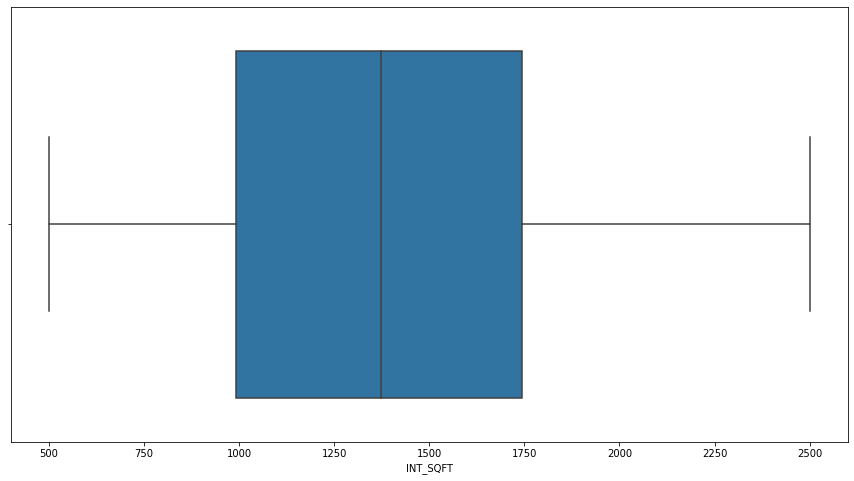

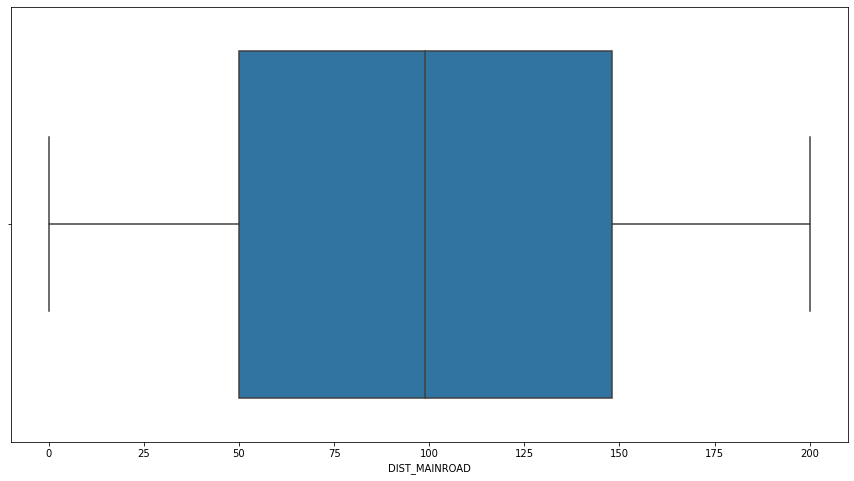

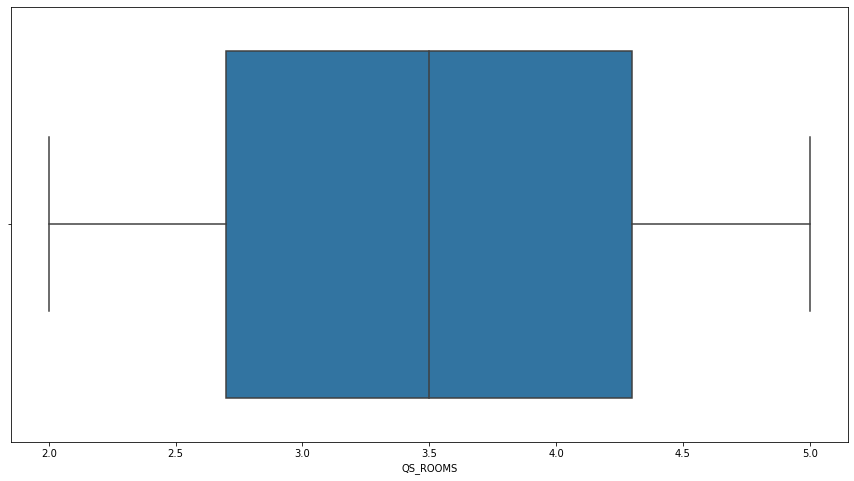

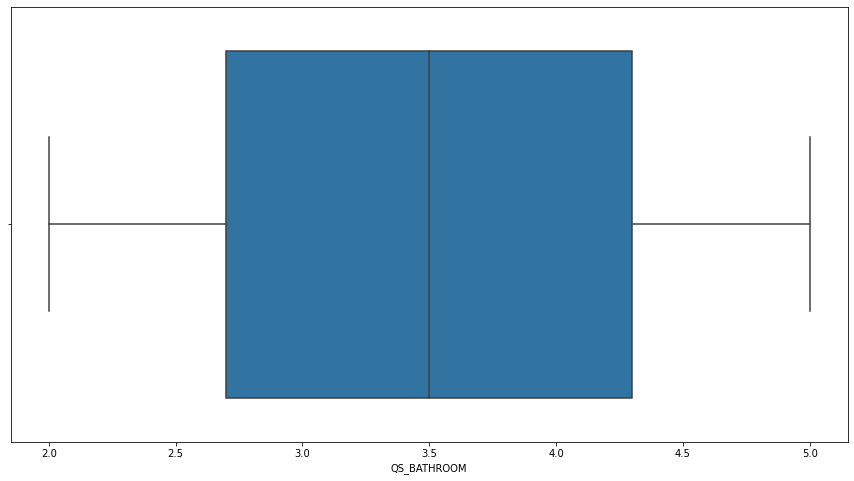

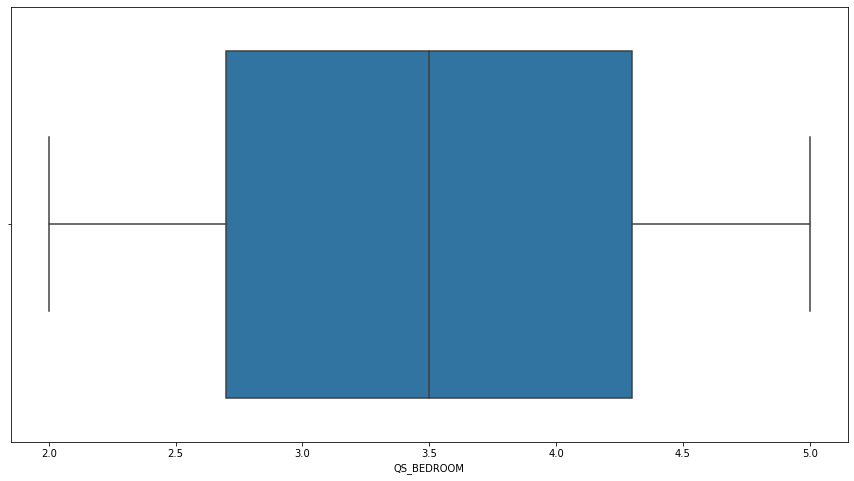

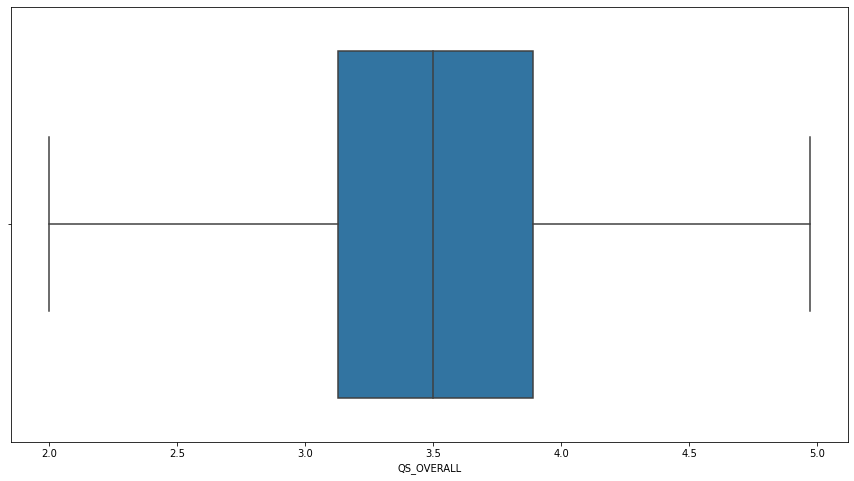

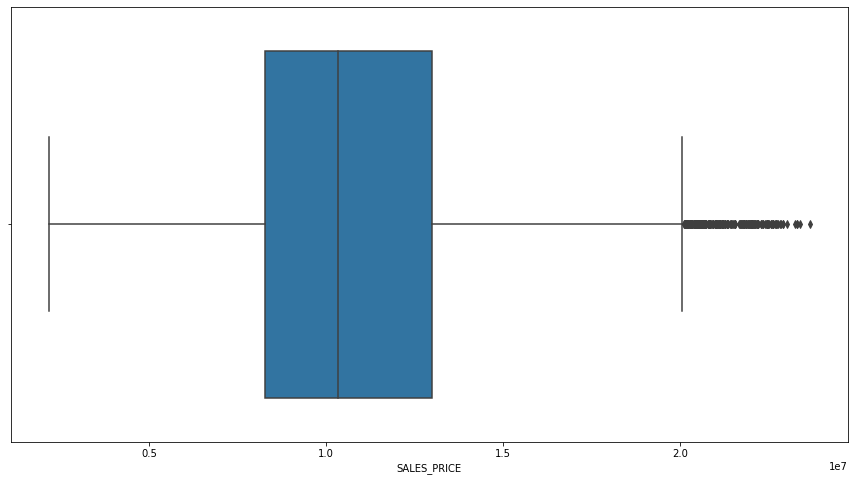

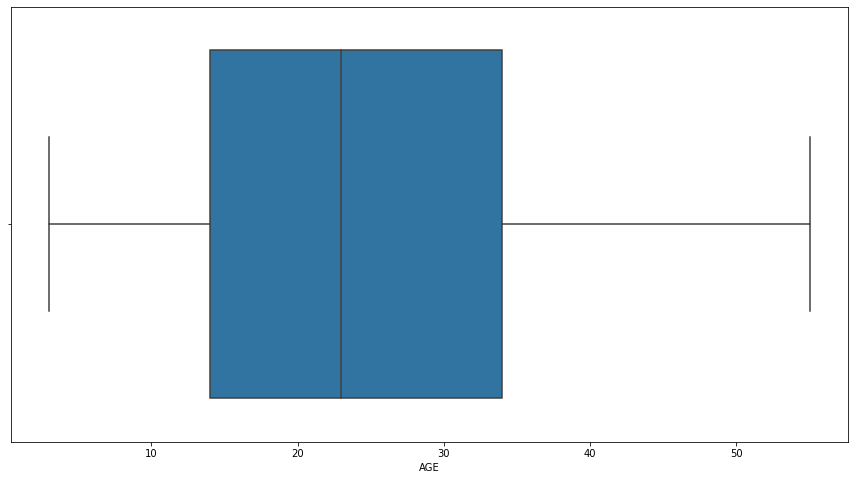

In [168]:
for i in df.columns:
  if (df[i].dtype != 'O') and i != 'N_BEDROOM' and i!='N_BATHROOM' and i!='N_ROOM':
    plt.figure(figsize = (15,8))
    ax = sns.boxplot(x= i,data=df)

Boxplots have been plotted for numerical data and its been found that sales price has outliers but, its okay those outliers has some sense

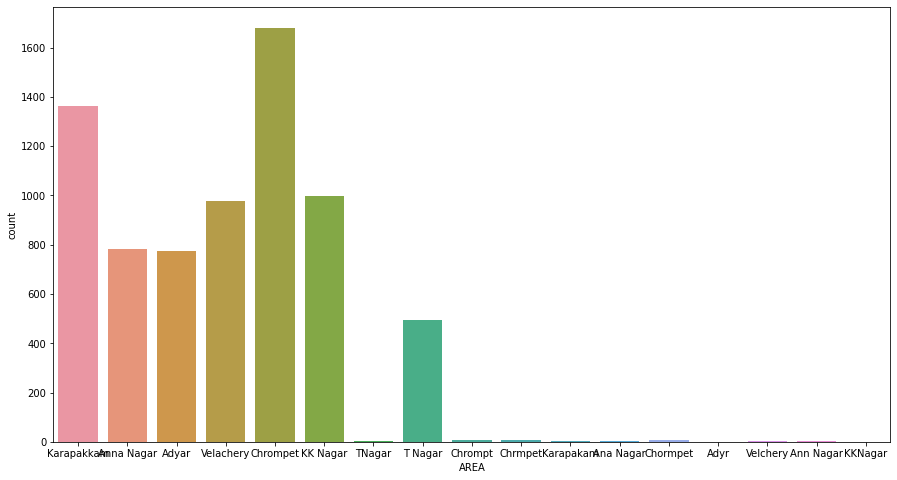

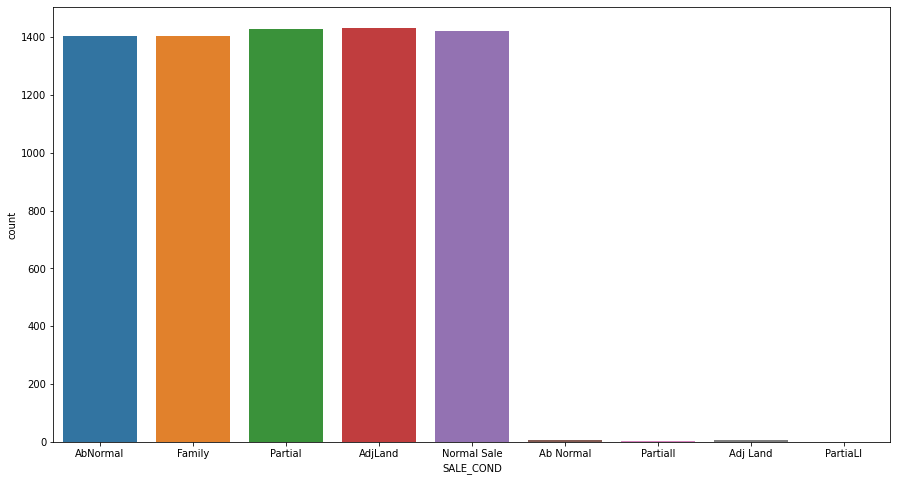

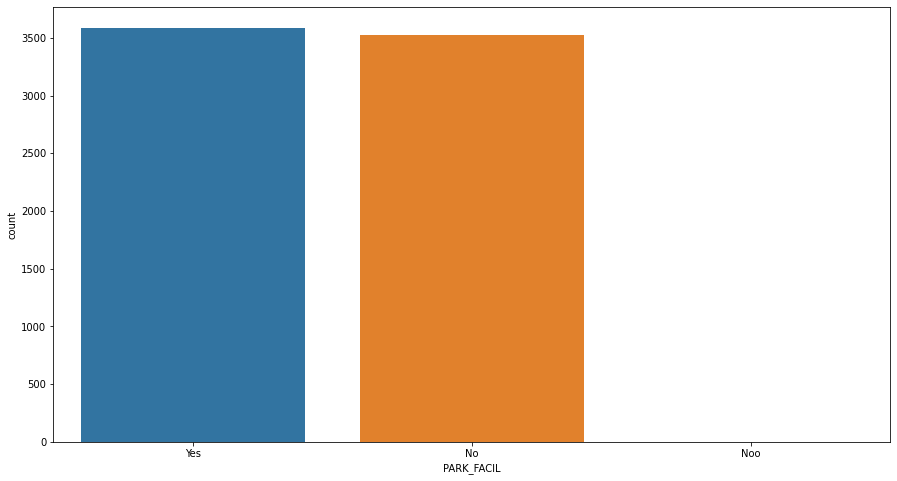

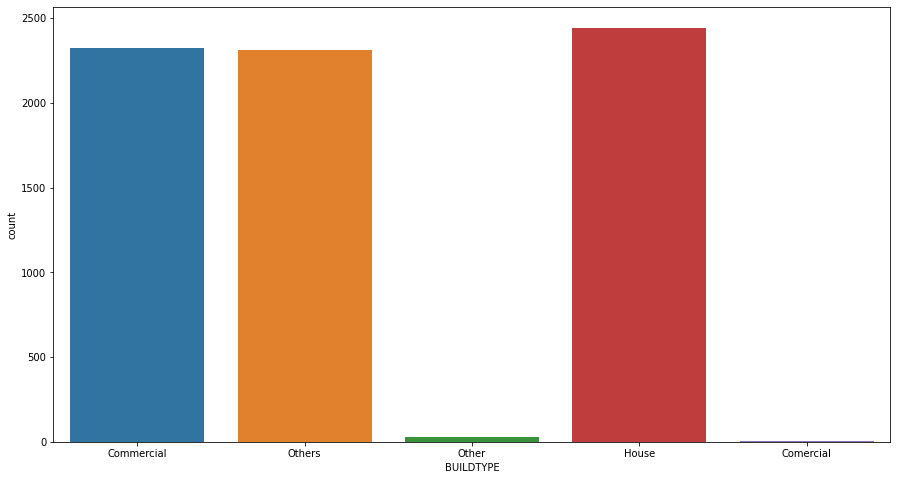

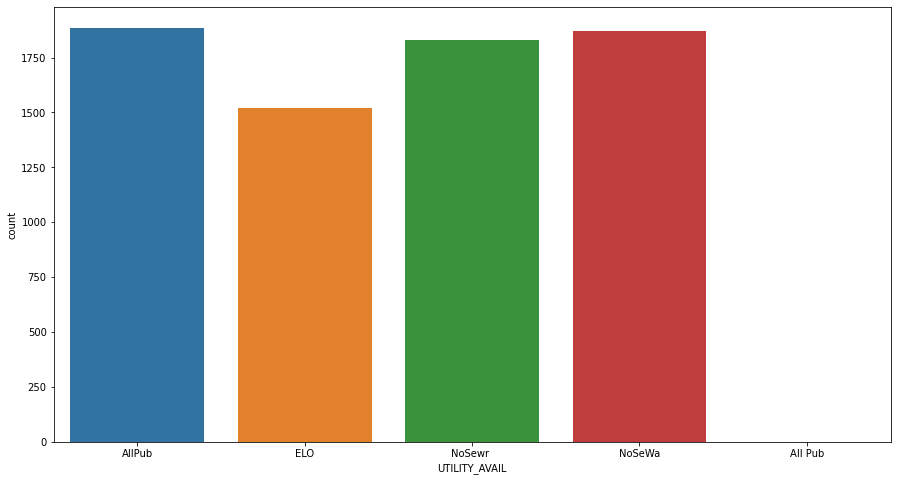

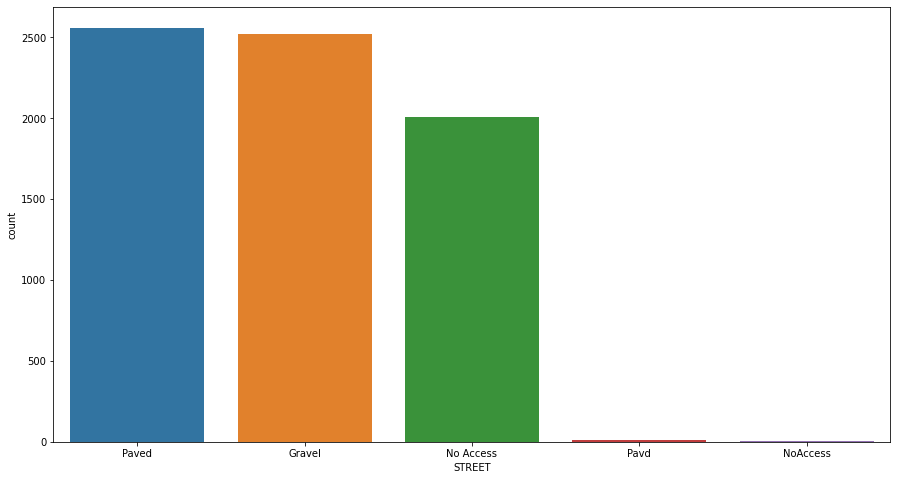

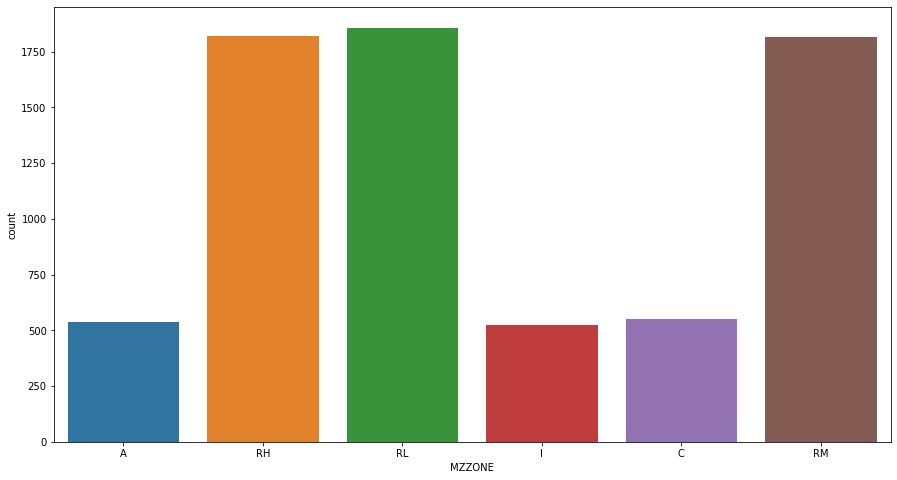

In [169]:
for i in df.columns:
  if (df[i].dtype == 'O'):
    plt.figure(figsize = (15,8))
    ax = sns.countplot(x= df[i])
    plt.xticks(rotation=0)

From the count plots, we can infer that some of the features have misspelled data. So, we need to replace those data.

In [170]:
for i in df.columns:
  if (i != 'PRT_ID') and (df[i].dtype == 'O'):
    print(i)
    print(df[i].unique())
    print('***********************************************************************************')

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
***********************************************************************************
SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
***********************************************************************************
PARK_FACIL
['Yes' 'No' 'Noo']
***********************************************************************************
BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']
***********************************************************************************
UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
***********************************************************************************
STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
*********************************************************************

In [171]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo':'No'})
df['AREA'] = df['AREA'].replace({'TNagar':'T Nagar','Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet',
                                 'Karapakam':'Karapakkam','Adyr':'Adyar','Ann Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar',
                                 'Velchery':'Velachery','KKNagar':'KK Nagar'})
df['SALE_COND'] = df['SALE_COND'].replace({'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Adj Land':'AdjLand'})
df['BUILDTYPE'] = df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'})
df['STREET'] = df['STREET'].replace({'NoAccess':'No Access','Pavd':'Paved'})
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'NoSewr ':'NoSewr','NoSeWa':'NoSewr','All Pub':'AllPub'})

Now, the spelling mistake data has been rectified.

In [172]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
AGE               0
dtype: int64

In [173]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].median(),inplace=True)
df['N_BEDROOM'].fillna(df['N_BEDROOM'].median(),inplace=True)
df['QS_OVERALL'].fillna(df['QS_OVERALL'].median(),inplace=True)

Imputing the null values with median

In [174]:
df = df.astype({"N_BEDROOM":'int', "N_BATHROOM":'int'}) 

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   int64  
 4   N_BATHROOM     7109 non-null   int64  
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  AGE            7109 non-null   int64  
dtypes: float

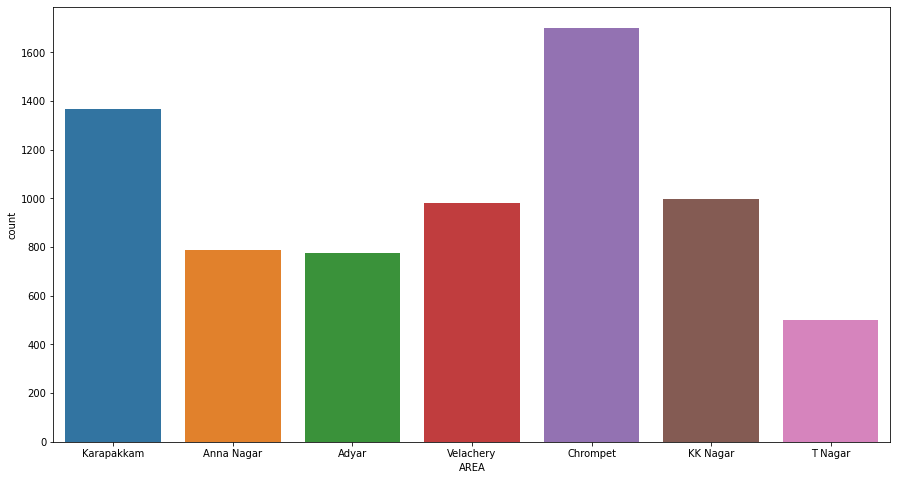

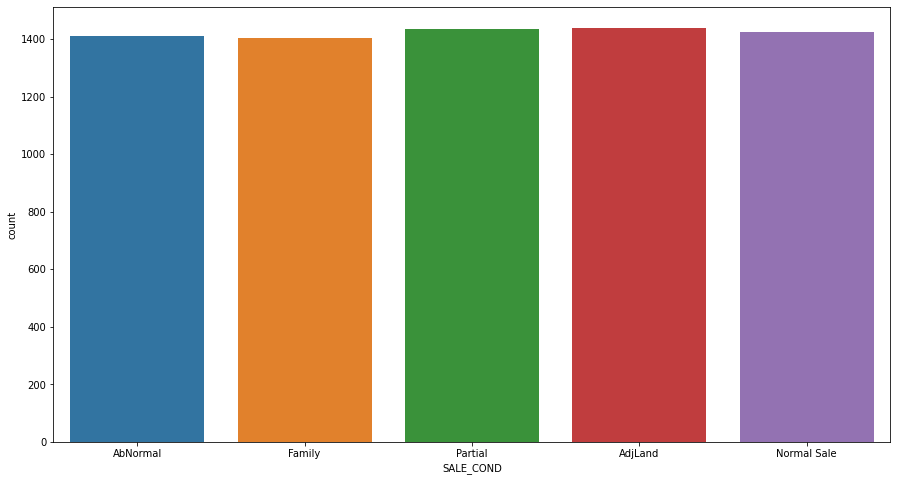

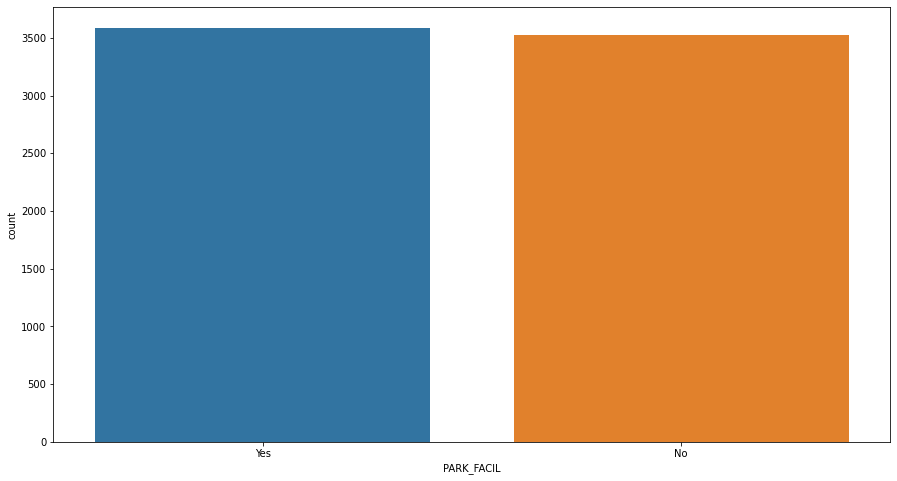

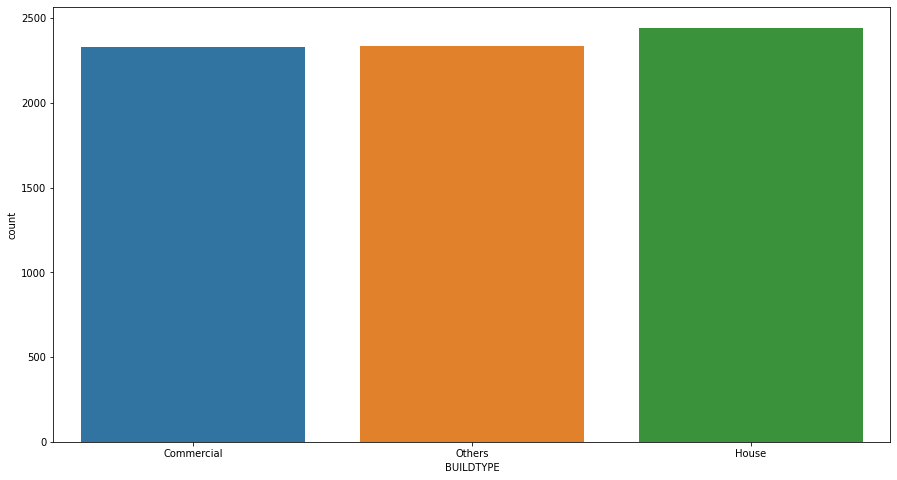

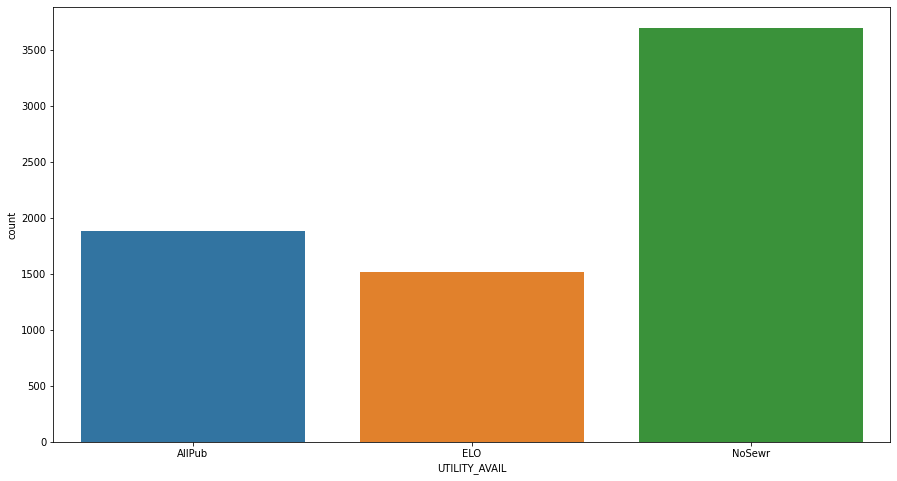

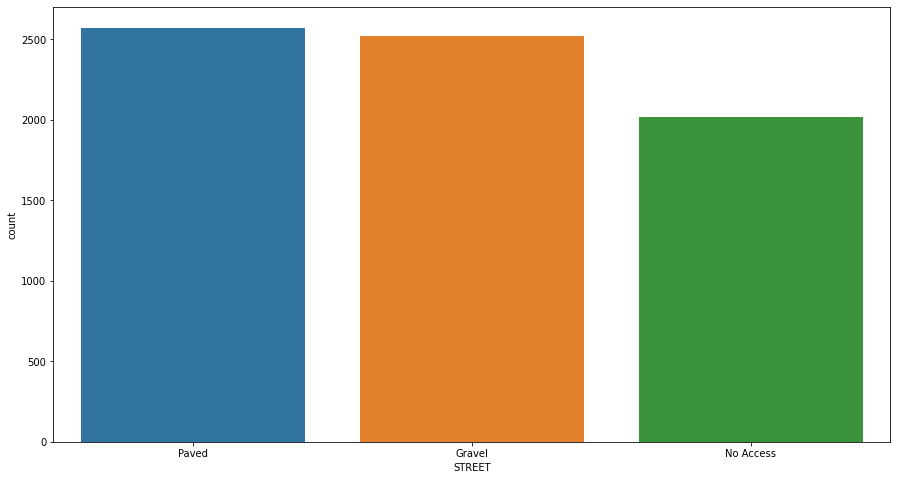

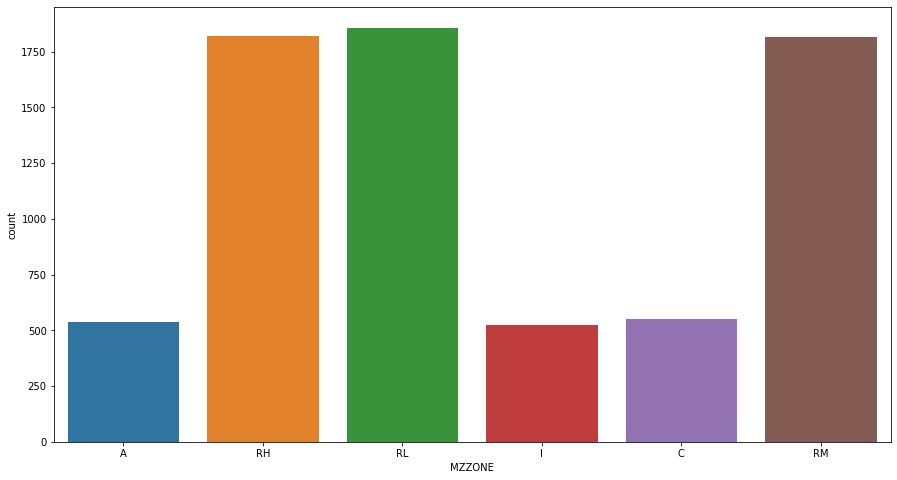

In [176]:
for i in df.columns:
  if (df[i].dtype == 'O'):
    plt.figure(figsize = (15,8))
    ax = sns.countplot(x= df[i])
    plt.xticks(rotation=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

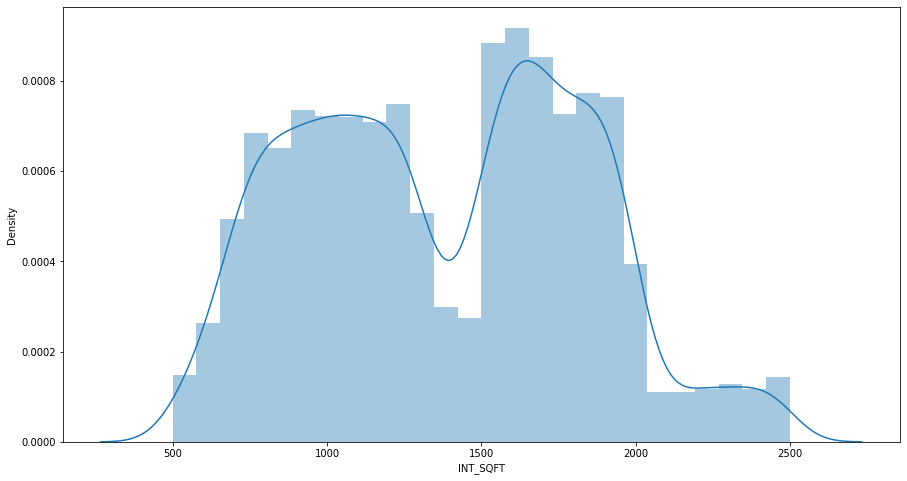

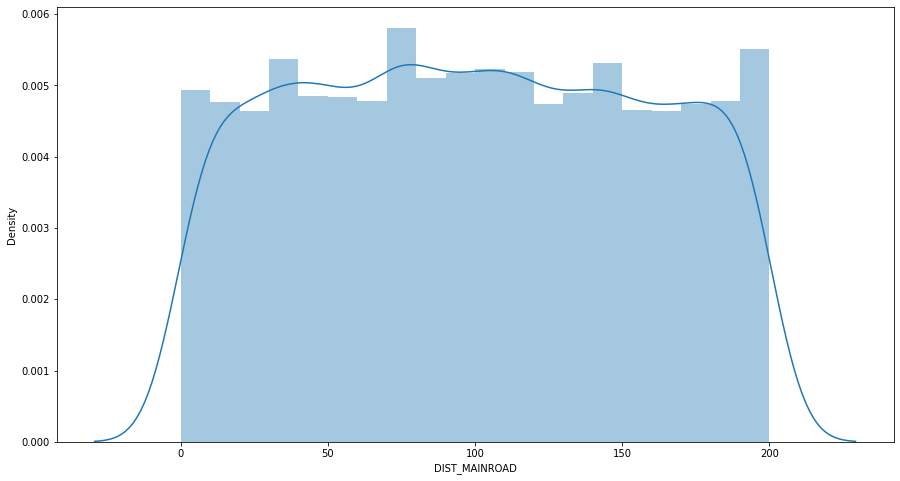

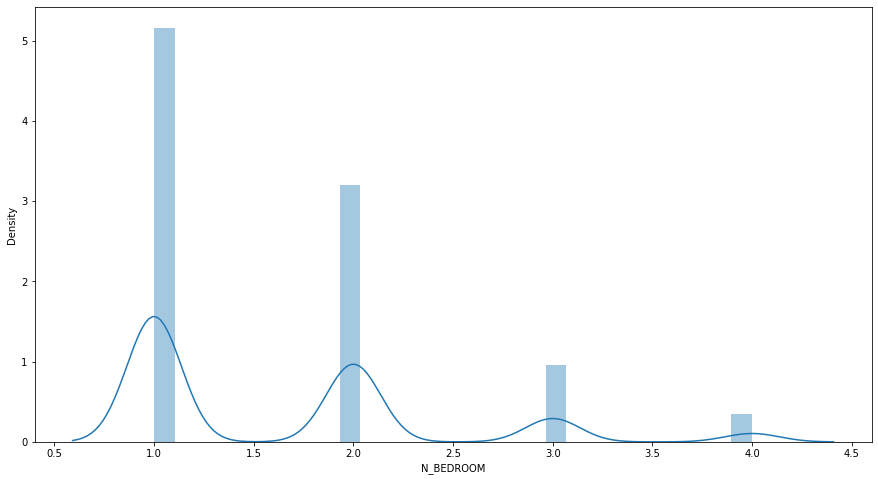

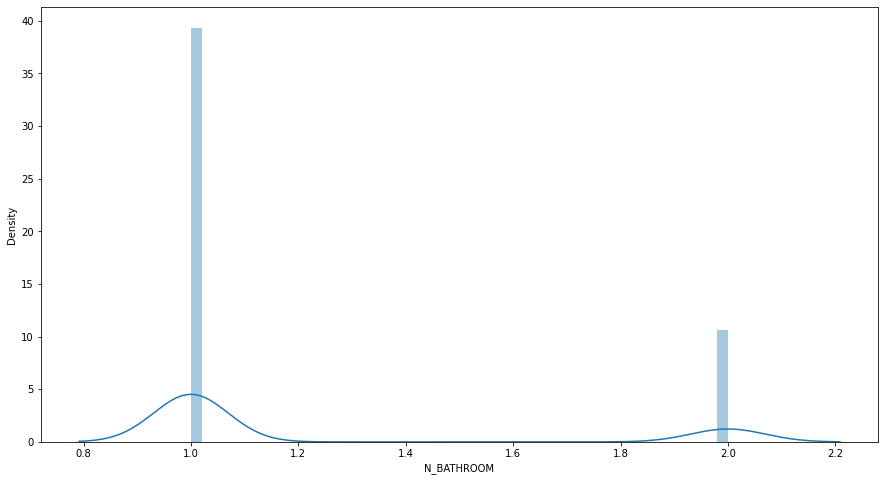

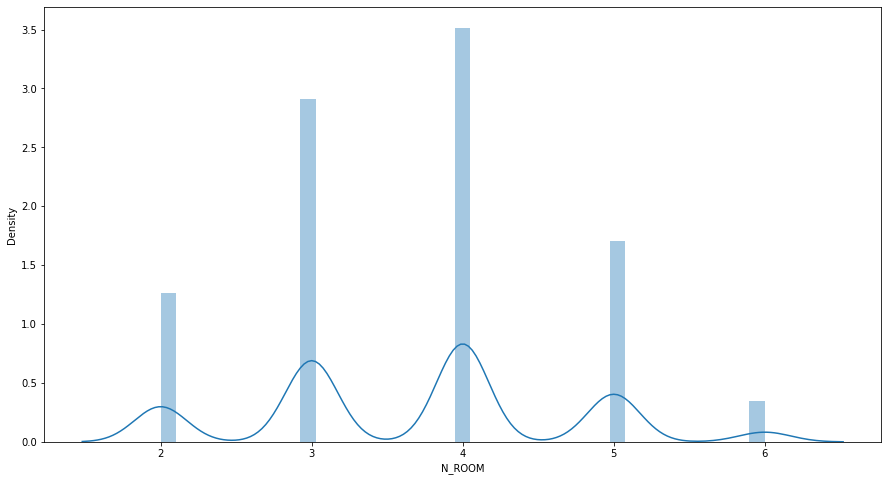

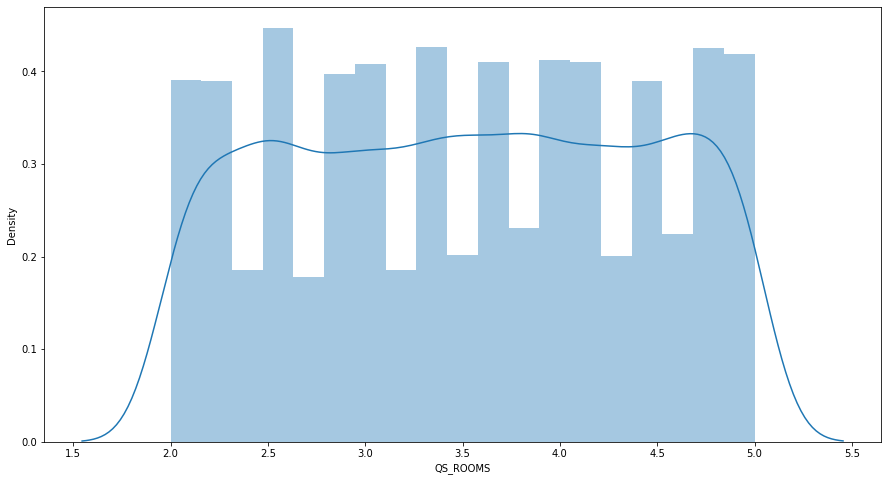

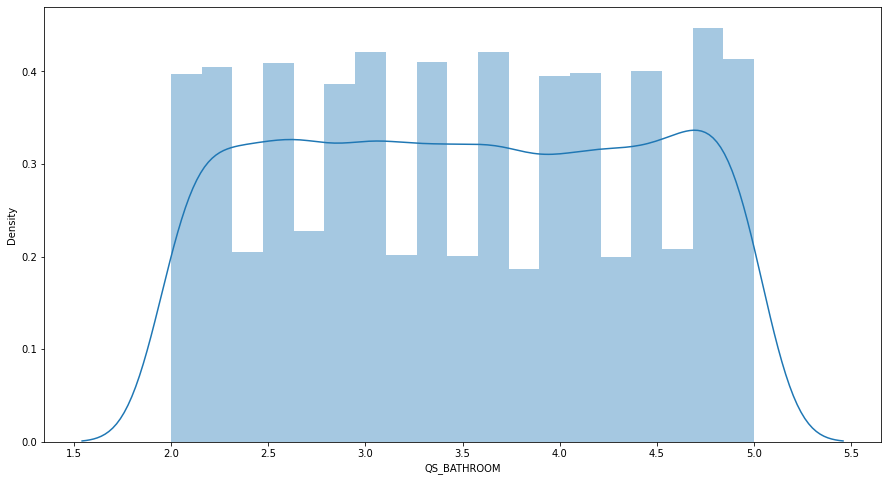

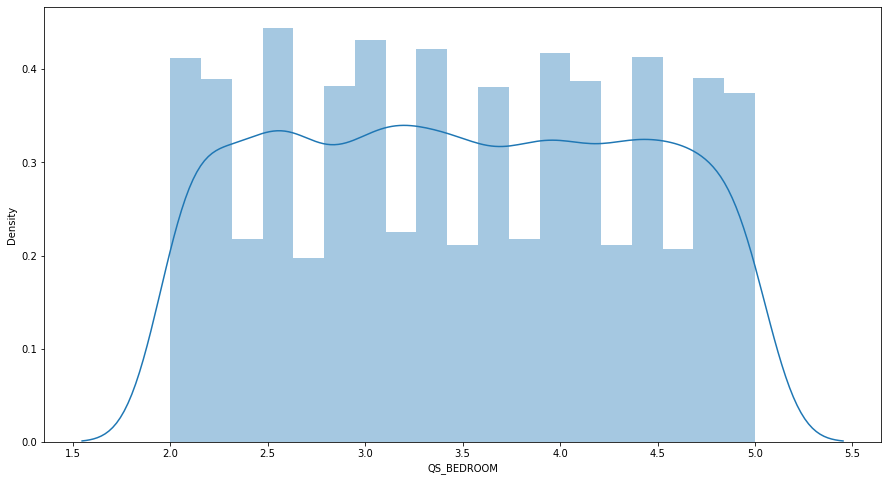

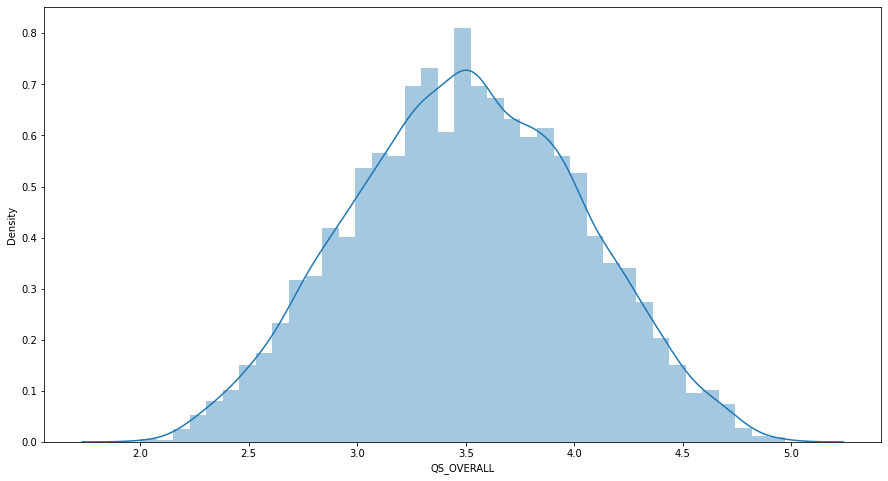

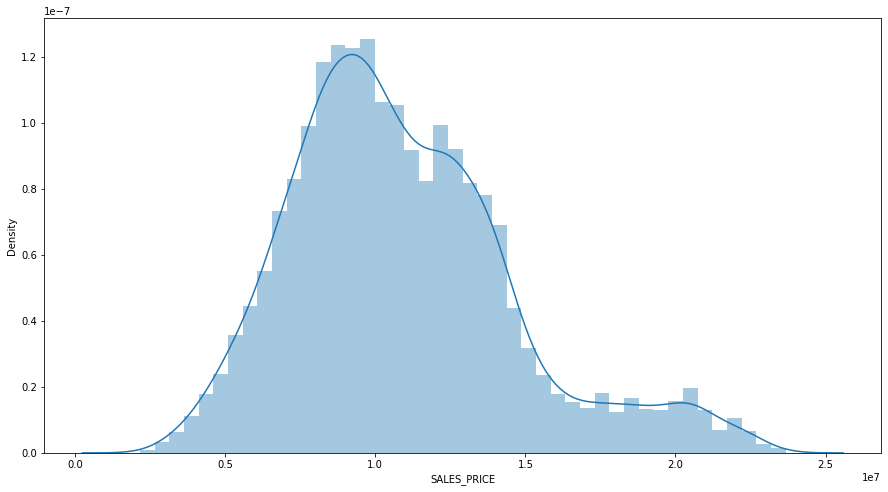

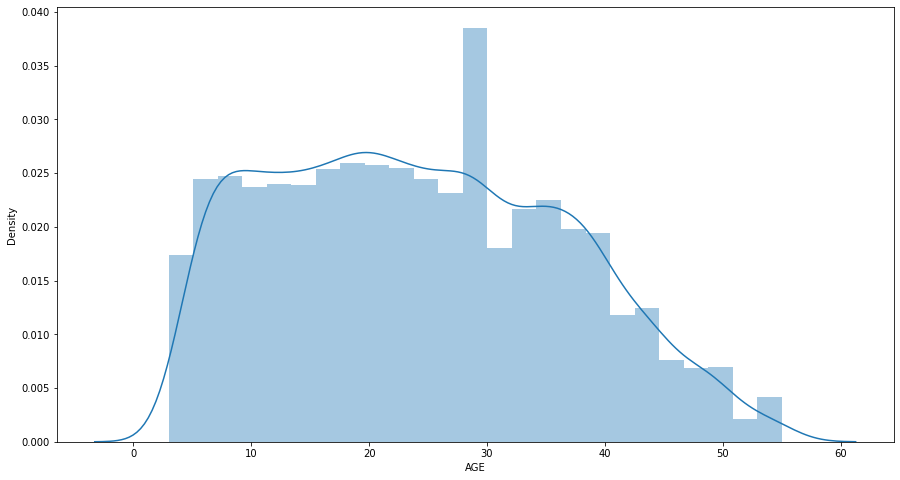

In [177]:
for i in df.columns:
  if (df[i].dtype != 'O'):
    plt.figure(figsize = (15,8))
    ax = sns.distplot(x= df[i])
    ax.set_xlabel(i)
    plt.xticks(rotation=0)

Sales price and QS overall plots show normal distribution

### Feature v/s Target plots

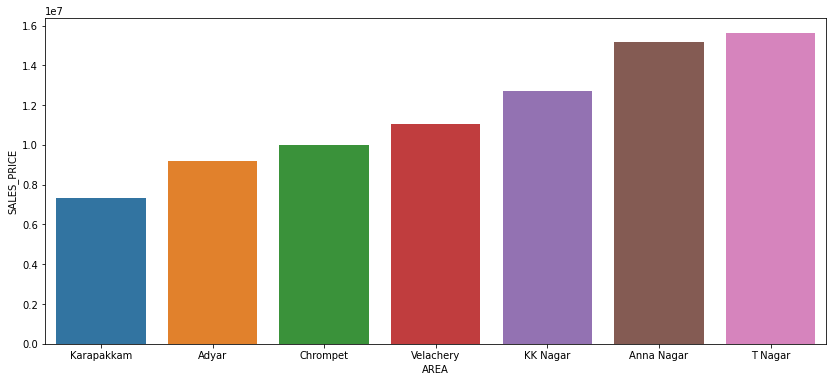

In [178]:
b = df.groupby('AREA')['SALES_PRICE'].mean().sort_values()
a = df.AREA.unique()
c = pd.DataFrame(data=b)
c.reset_index(inplace=True)
plt.figure(figsize=(14,6))
sns.barplot(x='AREA', y ='SALES_PRICE', data=c)
#plt.scatter(x=df.AREA.unique(),y=a)
plt.show()

Since there is a linear relationship with the target, we can use this feature for model building. And also Label encoder is suitable for encoding since it is ordinal.



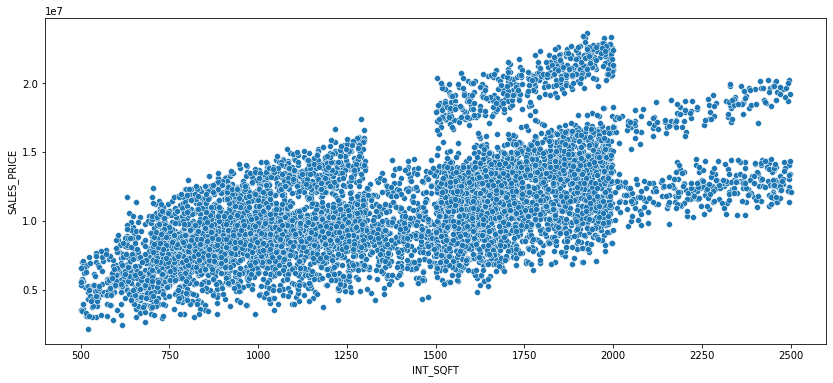

In [179]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',data=df)

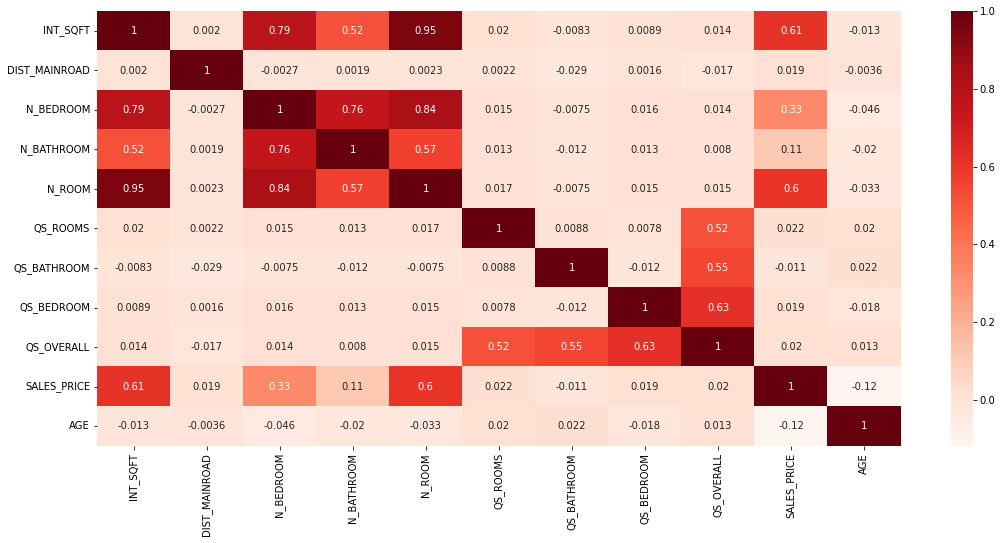

In [180]:
plt.figure(figsize=(18,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The plot b/n int_sqft and sales_price looks linear and it is confimed that linearity is there by using correlation.

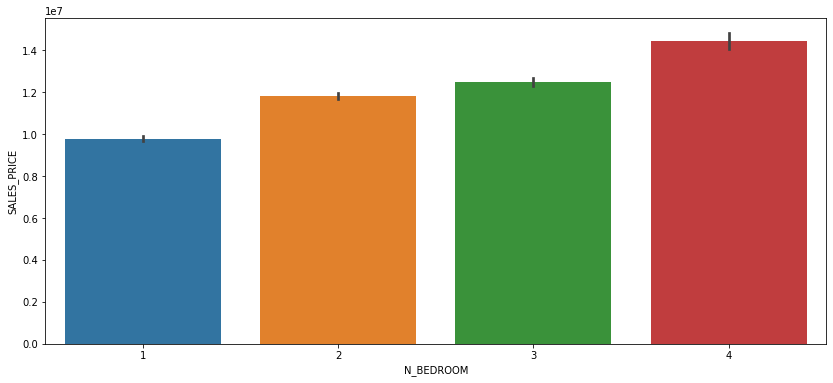

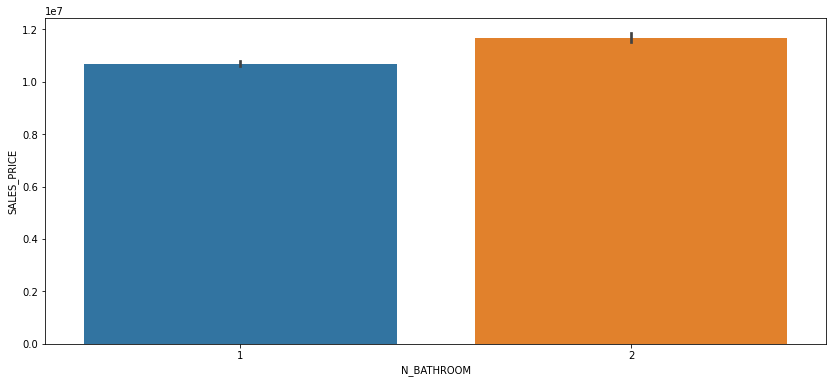

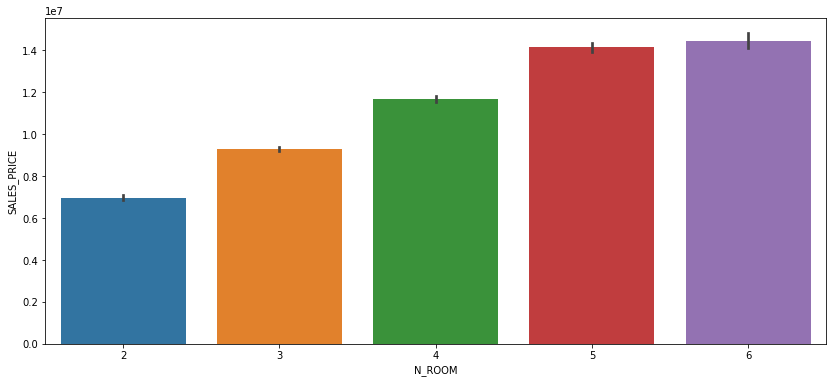

In [181]:
col1 = ['N_BEDROOM','N_BATHROOM','N_ROOM']
for i in col1:
  plt.figure(figsize=(14,6))
  sns.barplot(x=i,y="SALES_PRICE",data=df)
  plt.show()

Here the data of bedrooms, bathrooms and total rooms is kind of discrete data and they are defenitely influencing Sales price. Since it is already in coded format no encoding is required.

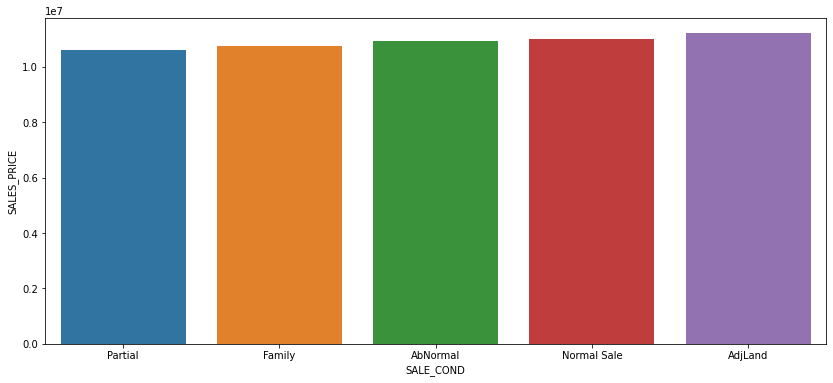

In [182]:
a = df.SALE_COND.unique()
b = df.groupby('SALE_COND')["SALES_PRICE"].mean().sort_values()
c = pd.DataFrame(data=b)
c.reset_index(inplace=True)
plt.figure(figsize=(14,6))
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=c)

As we can observe that there is linear relationship between sale_cond and sales_price. It is influencing target variable. And Label encoding is required since there is an increasing order of categorical variable(ordinal categorical variable).

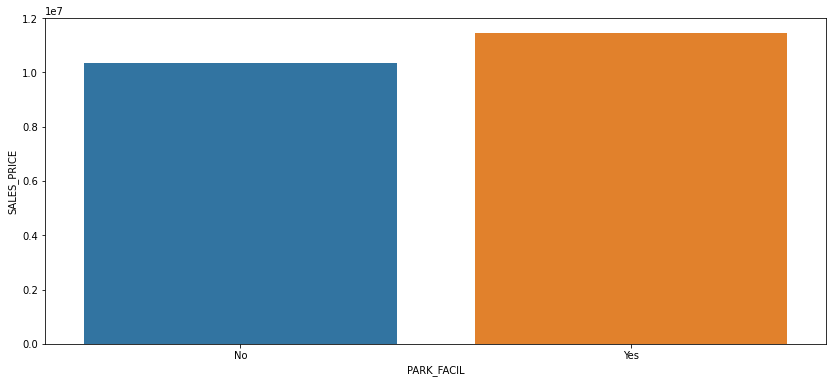

In [183]:
a = df.PARK_FACIL.unique()
b = df.groupby('PARK_FACIL')["SALES_PRICE"].mean().sort_values()
c = pd.DataFrame(data=b)
c.reset_index(inplace=True)
plt.figure(figsize=(14,6))
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=c)

It is binary category feature. so label encoding is suffiecient.

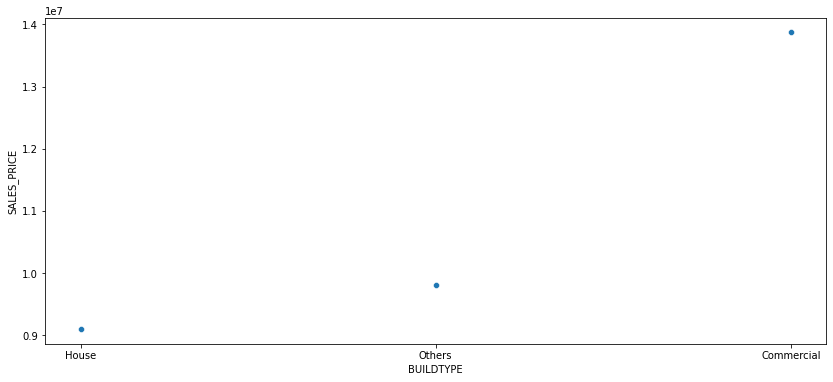

In [184]:
a = df.BUILDTYPE.unique()
b = df.groupby('BUILDTYPE')["SALES_PRICE"].mean().sort_values()
plt.figure(figsize=(14,6))
c = pd.DataFrame(data=b)
c.reset_index(inplace=True)
sns.scatterplot(x='BUILDTYPE',y='SALES_PRICE',data=c)

There is trend in the graph but there is no linear trend. So, one hot encoding is used

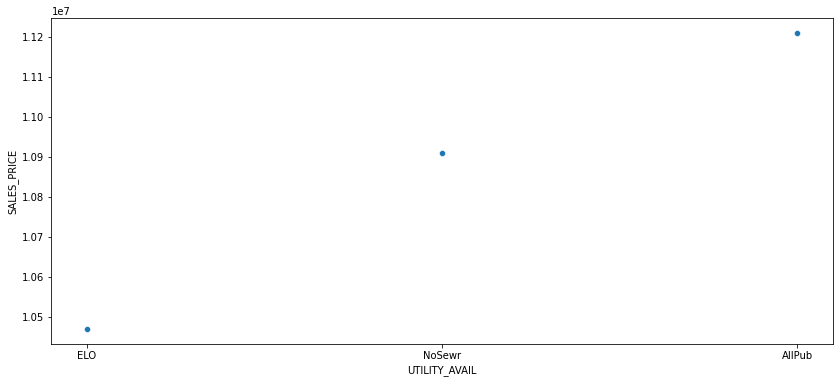

In [185]:
a = df.UTILITY_AVAIL.unique()
b = df.groupby('UTILITY_AVAIL')["SALES_PRICE"].mean().sort_values()
c = pd.DataFrame(data=b)
c.reset_index(inplace=True)
plt.figure(figsize=(14,6))
sns.scatterplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=c)

Its evident that there is a clear linear trend and hence also label encoding is opted. 

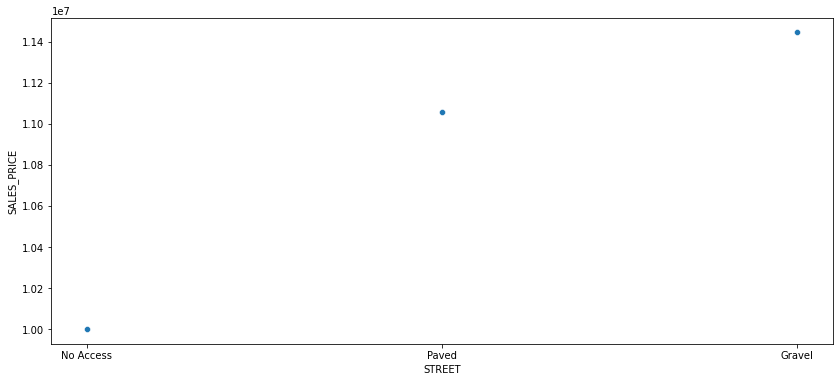

In [186]:
a = df.STREET.unique()
b = df.groupby('STREET')["SALES_PRICE"].mean().sort_values()
plt.figure(figsize=(14,6))
c = pd.DataFrame(data=b)
c.reset_index(inplace=True)
sns.scatterplot(x='STREET',y='SALES_PRICE',data=c)


There is linear trend in abouve graph and definitely street is important feature. For this also label encoding is enough since there is order in data.

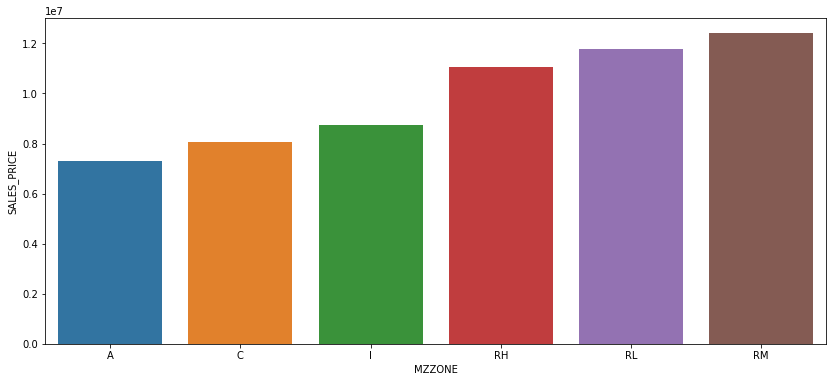

In [187]:
a = df.MZZONE.unique()
b = df.groupby('MZZONE')["SALES_PRICE"].mean().sort_values()
plt.figure(figsize=(14,6))
c = pd.DataFrame(data=b)
c.reset_index(inplace=True)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=c)

Since this feature is similiar to the area feature, it also follows same proccedings as Area feature.

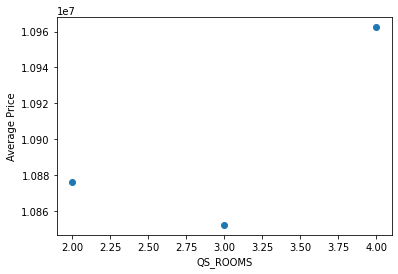

[10876054.35929029, 10852091.2642315, 10962343.362768497]


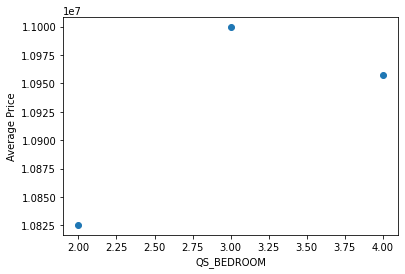

[10825416.068499759, 10999438.446139181, 10957778.513177523]


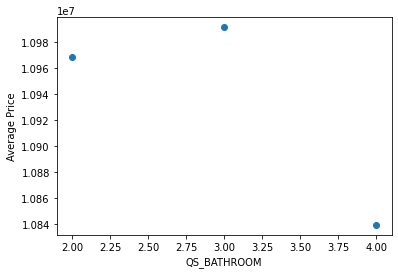

[10968565.097228974, 10991203.722986247, 10839573.539486203]


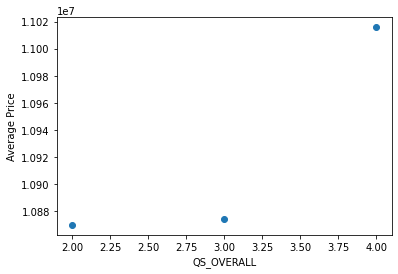

[10870022.37460815, 10874822.595232792, 11015790.832681783]


In [188]:
col2 = ['QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL']
for i in col2:
  a = [df.loc[(df[i] > x) & (df[i] < (x+1)),'SALES_PRICE'].mean() for x in range(2,5,1)]
  plt.scatter(x = list(range(2,5,1)), y = a)
  plt.xlabel(i)
  plt.ylabel('Average Price')
  plt.show()
  print(a)

Text(0.5, 1.0, 'AGE vs Price')

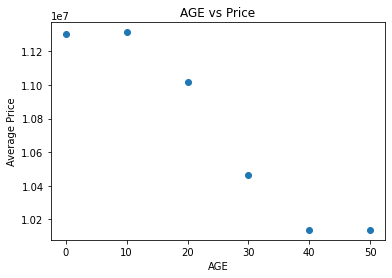

In [189]:
a = [df.loc[(df.AGE > i) & (df.AGE < (i+10)),'SALES_PRICE'].mean() for i in range(0,55,10)]

plt.scatter(x = list(range(0,55,10)), y = a)
plt.xlabel('AGE')
plt.ylabel('Average Price')
plt.title('AGE vs Price')

We have binned the age data with an interval of 10 years. we can see from plot that as age is increasing. we can assume that there is linear trend from the graph.

In [190]:
dfx = df.copy()

# Encoding

## Label Encoding

In [191]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['AREA'])
le.classes_  = np.array(['Karapakkam','Adyar','Chrompet','Velachery','KK Nagar','Anna Nagar','T Nagar'])
df['AREA'] = le.transform(df['AREA'])
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,0,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [192]:
le.fit(df['SALE_COND'])
le.classes_ = np.array(['Partial','Family','AbNormal','Normal Sale','AdjLand'])
df['SALE_COND'] = le.transform(df['SALE_COND'])
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,0,1004,131,1,1,3,2,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2,1,5,2,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1,1,3,2,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3,2,5,1,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1,1,3,2,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [193]:
le.fit(df['PARK_FACIL'])
le.classes_ = np.array(['Yes','No'])

df['PARK_FACIL'] = le.transform(df['PARK_FACIL'])
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,0,1004,131,1,1,3,2,0,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2,1,5,2,1,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1,1,3,2,0,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3,2,5,1,1,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1,1,3,2,0,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [194]:
le.fit(df['UTILITY_AVAIL'])

le.classes_ = np.array(['ELO','NoSewr','AllPub'])

df['UTILITY_AVAIL'] = le.transform(df['UTILITY_AVAIL'])
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,0,1004,131,1,1,3,2,0,Commercial,2,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2,1,5,2,1,Commercial,2,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1,1,3,2,0,Commercial,0,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3,2,5,1,1,Others,1,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1,1,3,2,0,Others,2,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [195]:
le.fit(df['STREET'])

le.classes_ = np.array(['No Access','Paved','Gravel'])

df['STREET'] = le.transform(df['STREET'])
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,0,1004,131,1,1,3,2,0,Commercial,2,1,A,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2,1,5,2,1,Commercial,2,2,RH,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1,1,3,2,0,Commercial,0,2,RL,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3,2,5,1,1,Others,1,1,I,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1,1,3,2,0,Others,2,2,C,3.0,2.5,4.1,3.290,7406250,30


In [196]:
le.fit(df['MZZONE'])

le.classes_ = np.array(['A','C','I','RH','RL','RM'])

df['MZZONE'] = le.transform(df['MZZONE'])
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,0,1004,131,1,1,3,2,0,Commercial,2,1,0,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2,1,5,2,1,Commercial,2,2,3,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1,1,3,2,0,Commercial,0,2,4,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3,2,5,1,1,Others,1,1,2,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1,1,3,2,0,Others,2,2,1,3.0,2.5,4.1,3.290,7406250,30


## One Hot Encoding

In [197]:
ohe = pd.get_dummies(df, columns = ['BUILDTYPE'])
df = df.merge(ohe)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,131,1,1,3,2,0,Commercial,2,...,0,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,5,1986,26,2,1,5,2,1,Commercial,2,...,3,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,1,909,70,1,1,3,2,0,Commercial,0,...,4,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,3,1855,14,3,2,5,1,1,Others,1,...,2,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,0,1226,84,1,1,3,2,0,Others,2,...,1,3.0,2.5,4.1,3.290,7406250,30,0,0,1


In [198]:
del df['DIST_MAINROAD']
del df['BUILDTYPE']
y = df.SALES_PRICE
X = df.drop(['SALES_PRICE'],axis=1)
print(X)
y 

      AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  PARK_FACIL  \
0        0      1004          1           1       3          2           0   
1        5      1986          2           1       5          2           1   
2        1       909          1           1       3          2           0   
3        3      1855          3           2       5          1           1   
4        0      1226          1           1       3          2           0   
...    ...       ...        ...         ...     ...        ...         ...   
7104     0       598          1           1       2          4           1   
7105     3      1897          3           2       5          1           0   
7106     3      1614          2           1       4          3           1   
7107     0       787          1           1       2          0           0   
7108     3      1896          3           2       5          0           0   

      UTILITY_AVAIL  STREET  MZZONE  QS_ROOMS  QS_BATHROOM  QS_

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7109, dtype: int64

# Splitting the data

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Scaled Data

In [200]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Model Buildng

## Linear Regression

In [201]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.9231714733710753

In [202]:
reg.fit(X_scaled_train,y_train)
reg.score(X_scaled_test,y_test)

0.9232442812016738

## KNN Regressor

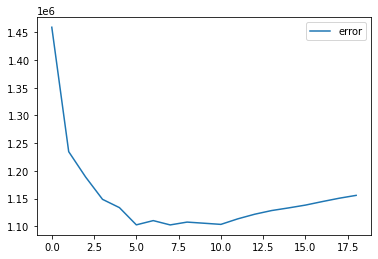

In [203]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(1,20):
    
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_scaled_train,y_train) 
    pred=model.predict(X_scaled_test) 
    error = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    
curve = pd.DataFrame(rmse_val,columns=['error']) #elbow curve 
curve.plot()

In [204]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 7}

In [205]:
knn.fit(X_scaled_train,y_train)
knn.score(X_scaled_test,y_test)

0.9129510220728893

In [206]:
from sklearn.metrics import r2_score
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(X_scaled_train,y_train) 
pred=model.predict(X_scaled_test)
print(r2_score(y_test,pred))
# model.score(X_test,y_test)

0.9165092477274913


Thats a very less score.

## Random Forest Regressor

In [207]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 69)
rf.fit(X_scaled_train,y_train)
rf.score(X_scaled_test,y_test)

0.9871133429791195

## XGBoost

In [208]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_scaled_train,y_train)
xgb.score(X_scaled_test,y_test)

[10:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9918682029139411

# Best fit model and hyper parameters

In [209]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=69)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92317147, 0.92166987, 0.92076481, 0.92802923, 0.92558809])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': rf,
            'params':{
                'max_depth': [10,20,50,100],
                'n_estimators': [100,200,400]
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.922668,{'normalize': True}
1,lasso,0.922667,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.970913,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,random_forest,0.986749,"{'max_depth': 20, 'n_estimators': 400}"


# RFE

In [ ]:
X.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [156]:
df6 = pd.DataFrame(X_scaled_train, columns = ['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'])
df6

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1.338351,0.981426,0.452541,-0.520148,1.288602,-0.705190,1.002994,-0.069580,-1.358524,0.460160,1.553177,-0.230574,-0.308214,0.614616,1.432529,-0.691311,1.368292,-0.699381
1,-0.287164,-1.264936,-0.791946,-0.520148,-0.671093,-0.705190,1.002994,1.374580,-1.358524,1.122004,-0.920904,1.551197,0.930682,1.073589,1.189191,1.446527,-0.730838,-0.699381
2,-0.829002,-0.436754,-0.791946,-0.520148,-0.671093,-0.705190,1.002994,1.374580,-0.098383,0.460160,1.215802,-0.007852,0.705428,1.207457,-0.676400,1.446527,-0.730838,-0.699381
3,-1.370840,-1.282418,-0.791946,-0.520148,-1.650941,-0.705190,1.002994,-0.069580,-1.358524,-0.863528,1.328261,0.883033,-1.547109,0.079147,-0.270837,-0.691311,-0.730838,1.429837
4,0.796513,0.574983,0.452541,-0.520148,0.308755,0.704199,1.002994,-0.069580,-0.098383,0.460160,0.990886,0.103508,0.480174,0.882351,-0.108611,-0.691311,1.368292,-0.699381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,-0.287164,-0.978678,-0.791946,-0.520148,-0.671093,-0.705190,-0.997015,-1.513739,1.161758,0.460160,-0.021238,-1.566902,1.719070,-0.207711,0.459177,-0.691311,1.368292,-0.699381
5683,-1.370840,-0.130829,-0.791946,-0.520148,-0.671093,1.408894,-0.997015,-0.069580,-0.098383,-0.863528,-0.808445,-0.898738,1.155936,-0.092968,-1.487527,1.446527,-0.730838,-0.699381
5684,-0.287164,-0.653087,-0.791946,-0.520148,-0.671093,-0.000496,-0.997015,1.374580,-1.358524,-0.201684,-0.695987,1.551197,-0.533468,0.442501,0.134727,1.446527,-0.730838,-0.699381
5685,-1.370840,-0.657457,-0.791946,-0.520148,-0.671093,-0.000496,-0.997015,1.374580,-1.358524,0.460160,0.203679,0.660312,1.606443,1.532563,1.189191,-0.691311,1.368292,-0.699381


In [210]:
X_train_n = df6.drop(['QS_ROOMS', 'MZZONE',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],axis=1)
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=7, step=1)
selector = selector.fit(df6[::],y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],selector.support_))

[('AREA', True),
 ('INT_SQFT', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('AGE', False),
 ('BUILDTYPE_Commercial', True),
 ('BUILDTYPE_House', True),
 ('BUILDTYPE_Others', True)]

Based on Repeated Feature Elimination technique, Buildtype: House, Area, Number of rooms and bedrooms, MZ zones are the top 5 important factors that effect the Sales price of houses in chennai.

In [214]:
dfx.groupby('AREA')['SALES_PRICE'].mean()

AREA
Adyar         9.185668e+06
Anna Nagar    1.516820e+07
Chrompet      1.001381e+07
KK Nagar      1.269623e+07
Karapakkam    7.340100e+06
T Nagar       1.561674e+07
Velachery     1.104735e+07
Name: SALES_PRICE, dtype: float64

In [216]:
dfx.groupby('N_ROOM')['SALES_PRICE'].mean()

N_ROOM
2    6.982718e+06
3    9.298812e+06
4    1.169143e+07
5    1.414533e+07
6    1.445131e+07
Name: SALES_PRICE, dtype: float64